# Server Load Prediction 

### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the train and test data into pandas dataframe

In [2]:
train_df = pd.read_csv('server_train.csv')
test_df = pd.read_csv('server_test.csv')

train_df.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [4]:
## Check the shape of the train and test dataframe
print(f'Shape of train data frame: {train_df.shape}')
print(f'Shape of test data frame: {test_df.shape}')

Shape of train data frame: (119782, 88)
Shape of test data frame: (58998, 88)


In [5]:
# get basic information about the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119782 entries, 0 to 119781
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   m_id                          119782 non-null  object 
 1   syst_direct_ipo_rate          119782 non-null  float64
 2   syst_buffered_ipo_rate        119782 non-null  float64
 3   syst_page_fault_rate          119782 non-null  float64
 4   syst_page_read_ipo_rate       119782 non-null  float64
 5   syst_process_count            119782 non-null  int64  
 6   syst_other_states             119782 non-null  int64  
 7   page_page_write_ipo_rate      119782 non-null  float64
 8   page_global_valid_fault_rate  119782 non-null  float64
 9   page_free_list_size           119782 non-null  int64  
 10  page_modified_list_size       119782 non-null  int64  
 11  io_mailbox_write_rate         119782 non-null  float64
 12  io_split_transfer_rate        119782 non-nul

- Data types present in the train dataframe are **int64, float64 and object**.

In [6]:
# check the distribution of target variable in the train dataset
train_df.cpu_load.value_counts()

medium    62016
low       42595
high      15171
Name: cpu_load, dtype: int64

- **Target variable is imbalanced**.

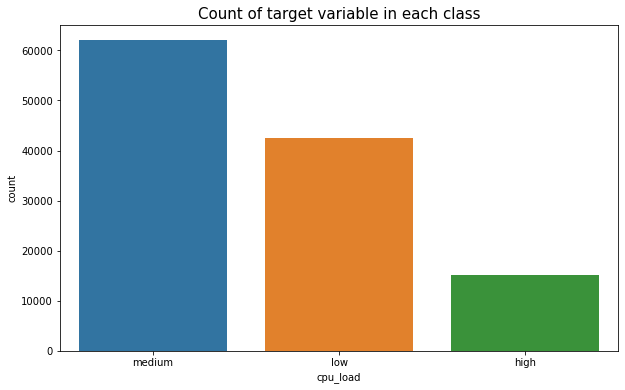

In [7]:
# plot the distribution of target variable in the train dataset
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'cpu_load', data = train_df, ax = ax)
ax.set_title('Count of target variable in each class', fontsize = 15);

### Check the null values in the dataframe

In [8]:
train_df[train_df.columns[train_df.isna().any()]].isnull().sum()

Series([], dtype: float64)

- **There are no null values present in the train dataset**.

In [9]:
## Check the number of servers in the train dataset
train_df.m_id.value_counts()

b    17172
d    17137
e    17137
f    17099
g    17093
a    17092
c    17052
Name: m_id, dtype: int64

- There are 7 servers in the dataset with almost equal number of entries.

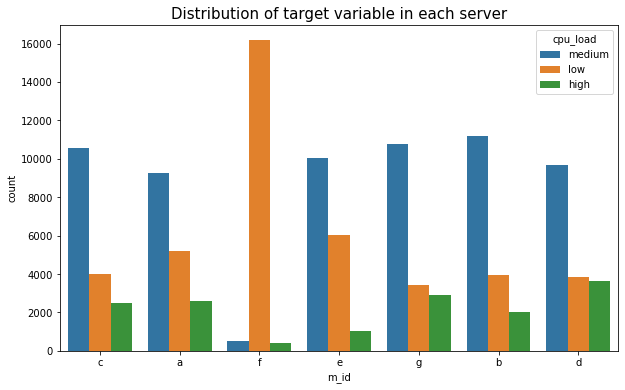

In [10]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'm_id', data = train_df, hue = 'cpu_load', ax = ax)
ax.set_title('Distribution of target variable in each server', fontsize = 15);

- All servers have **medium load** except the **server f** which is on **low load**.
- Servers **e & f** have been loaded **high** least number of times. 

### NEW WORK

In [11]:
# Server a
server_a = train_df[train_df.m_id == 'a']
server_a_low = server_a[server_a.cpu_load == 'low']
server_a_medium = server_a[server_a.cpu_load == 'medium']
server_a_high = server_a[server_a.cpu_load == 'high']

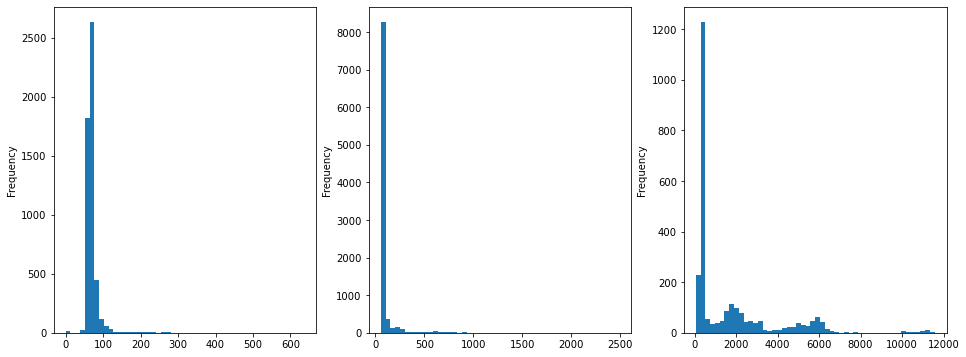

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
server_a_low['syst_direct_ipo_rate'].plot(kind = 'hist', bins = 50, ax = ax[0])
server_a_medium['syst_direct_ipo_rate'].plot(kind = 'hist', bins = 50, ax = ax[1])
server_a_high['syst_direct_ipo_rate'].plot(kind = 'hist', bins = 50, ax = ax[2]);

In [ ]:
# set the values of server_a for high load
server_a_high.loc[server_a_high.syst_direct_ipo_rate > 4000, 'syst_direct_ipo_rate'] = 4000

In [17]:
server_a_low.syst_direct_ipo_rate.sort_values()[:30]

41         0.00
78122      0.00
13717      0.00
13257      0.00
61521      0.00
99910      0.00
59160      0.00
36486      0.00
36519      0.00
56164      0.00
55335      0.00
19846      0.00
102778     0.00
55207      0.00
109267     0.00
88311     44.83
94530     49.80
85220     50.03
65820     50.18
63612     50.27
9851      50.28
87631     50.28
66308     50.32
43748     50.37
36680     50.38
41980     50.43
7491      50.48
52791     50.62
72094     50.65
102370    50.70
Name: syst_direct_ipo_rate, dtype: float64

In [18]:
server_a_low.syst_direct_ipo_rate.sort_values()[-30:]

77955     211.73
116891    215.20
38691     217.90
38509     218.00
78808     229.10
66387     232.95
29683     233.68
16859     237.28
90136     242.03
63730     255.28
94139     256.90
76135     257.58
52595     265.58
104195    267.73
81711     276.18
13281     278.98
434       288.13
25823     290.68
30545     297.47
97141     300.35
15972     307.55
71068     310.12
38142     327.57
39456     332.77
88454     368.33
67752     387.47
90733     413.37
26932     427.50
70063     604.53
62877     637.13
Name: syst_direct_ipo_rate, dtype: float64

In [19]:
server_a_medium.syst_direct_ipo_rate.sort_values()[:30]

41549     54.55
101447    57.22
107518    57.38
95611     58.87
56397     59.15
107689    59.73
46373     59.88
42830     59.95
109023    60.10
8845      60.17
39587     60.25
32313     60.28
16610     60.40
40942     60.55
57712     60.55
81954     60.60
42564     60.65
45132     60.68
76064     60.68
66793     60.70
15657     60.75
61390     60.77
111215    60.78
8281      60.80
27065     60.88
55010     60.90
119517    60.95
20240     60.97
72841     60.97
88710     61.05
Name: syst_direct_ipo_rate, dtype: float64

In [20]:
server_a_medium.syst_direct_ipo_rate.sort_values()[-30:]

14230     1355.10
118575    1409.13
98473     1423.90
21326     1431.15
89050     1458.75
62666     1466.37
47122     1474.73
94897     1475.52
6403      1478.50
12602     1497.77
71105     1505.42
21607     1519.80
48999     1557.93
114421    1579.68
41668     1646.48
98660     1689.97
22331     1726.45
51759     1806.23
73499     1873.88
38766     1910.10
90235     2002.32
105092    2067.82
58181     2150.95
27490     2202.00
108763    2216.88
73019     2308.02
54054     2372.35
26684     2376.17
28871     2456.30
73232     2491.43
Name: syst_direct_ipo_rate, dtype: float64

In [21]:
server_a_high.syst_direct_ipo_rate.sort_values()[:30]

48542     63.65
18490     66.15
62636     67.23
10943     67.72
106456    68.75
36527     69.35
93023     69.65
80728     69.90
1880      70.75
20080     72.48
108486    72.60
67909     72.80
412       74.70
54512     76.02
13078     76.38
94263     76.55
59819     76.70
6502      76.73
45382     76.92
21660     77.22
58247     77.33
56239     78.37
41809     78.90
42462     79.30
63881     79.85
96281     79.87
74161     80.78
19826     80.88
95335     81.50
24974     81.75
Name: syst_direct_ipo_rate, dtype: float64

In [ ]:
## Check the number of servers in the test dataset
test_df.m_id.value_counts()

- Same number of servers are present in the **train and test data set**.

In [ ]:
# Description of the dataset
pd.set_option('display.max_rows', 86)
train_df.describe().T

### Exploratory Data Analysis

In [ ]:
def box_plot(column_name):
    """
    This function will draw box plot for the column_name if its datatype is float64
    
    Args:
        column_name: name of the column in the train_df
    """
    if train_df[column_name].dtypes == 'float64':
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(train_df.m_id, train_df[column_name], hue = train_df.cpu_load, dodge = True, ax = ax)
        ax.set_title(f'Distribution of {column_name} column variable across the servers', fontsize = 15)
    
    else:
        pass

### Explore each float type column in the train dataframe

In [ ]:
# set the order of categories in m_id column of the dataframe
m_id_order = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = m_id_order)
train_df['m_id'] = train_df['m_id'].astype(ordered_cat)

In [ ]:
# set the order of categories in cpu_load column of the dataframe
cpu_load_order = ['low', 'medium', 'high']
ordered_load = pd.api.types.CategoricalDtype(ordered = True, categories = cpu_load_order)
train_df['cpu_load'] = train_df['cpu_load'].astype(ordered_load)

In [ ]:
box_plot('syst_direct_ipo_rate')

- **Server a** has highest values of **syst_direct_ipo_rate** when cpu is on **high_load** among all the servers.
- Server **b, e, f** have no outliers when cpu is on **high_load**, while other servers have outliers.
- Outliers are present in all the servers when cpu is on **low & medium** load.
- **low_load** on all the servers lies below 1000, **medium_load** lies around 2000 and **high_load** is around 4000 (except server a).

In [ ]:
box_plot('syst_buffered_ipo_rate')

- **Server a** has highest values of **syst_buffered_ipo_rate** on **all loading conditions of cpu** among all the servers.
- All servers, except server a has **similar syst_buffered_ipo_rate on all loading conditions of cpu**.

In [ ]:
box_plot('syst_page_fault_rate')

- **Server f** has highest values of **syst_page_fault_rate** when cpu is on **high_load**.
- All servers have similar values of **syst_page_fault_rate** when cpu is on **low_load**.

In [ ]:
box_plot('syst_page_read_ipo_rate')

- **Server a and c** has highest **syst_page_read_ipo_rate** when cpu is on **high_load**.
- **Server f** has highest **syst_page_read_ipo_rate** when cpu is on **medium_load**.

In [ ]:
box_plot('page_global_valid_fault_rate')

- **Server a and c** has highest **page_global_valid_fault_rate** when cpu is on **high_load**.
- **Server f** has highest **page_global_valid_fault_rate** when cpu is on **medium_load**.

In [ ]:
box_plot('io_mailbox_write_rate')

- **Server a** has highest values of **io_mailbox_write_rate** on **all loading conditions of cpu**.
- **Server f** has different behaviour on all loading conditions of cpu.

In [ ]:
box_plot('io_split_transfer_rate')

- All servers have similar values of **io_split_transfer_rate** when cpu is on **low_load**.
- **Server a and f** has least values of **io_split_transfer_rate** on **all loading conditons of cpu**.

In [ ]:
box_plot('io_file_open_rate')

- All servers have similar values of **io_file_open_rate** under **all loading condtions of cpu**.

In [ ]:
box_plot('io_logical_name_trans')

- **Server a** has highest values of **io_logical_name_trans** on **all loading conditions of cpu**.

In [ ]:
box_plot('io_page_reads')

- All servers have similar values of **io_page_reads** under **all loading condtions of cpu**.

In [ ]:
box_plot('io_page_writes')

- **Server f** has unusual values of **io_page_writes** on **all loading conditions of cpu**.
- **Server a** has highest values of **io_page_writes** when cpu is on **low and medium load**.

In [ ]:
box_plot('page_free_list_faults')

- **Server a** has large values of **page_free_list_faults** when cpu is on **medium and high load**.

In [ ]:
box_plot('page_modified_list_faults')

- **Server a** has highest values of **page_modified_list_faults** when cpu is on **high_load**.

In [ ]:
box_plot('page_demand_zero_faults')

- **Server f** has highest values of **page_demand_zero_faults** when cpu is on **high_load**.

In [ ]:
box_plot('app07_dirio')

- The above box plot of **app07_dirio** has very small values on all loading conditions of cpu.

In [ ]:
box_plot('app07_bufio')

- **Server b, d and g** have mean values of **app07_bufio** around 500 when cpu is on **medium and high load**.
- **Server a** has highest values of **app07_bufio** when cpu is on **medium and high load**.

In [ ]:
box_plot('app07_pgflts')

- All servers have similar values of **app07_pgflts** on all **loading conditions of cpu** except few outliers.

In [ ]:
col_list = ['app04_dirio', 'app04_bufio', 'app04_pgflts', 'app08_dirio', 'app08_bufio', 'app08_pgflts', 'app01_dirio', 
            'app01_bufio', 'app01_pgflts', 'app05_dirio', 'app05_bufio', 'app05_pgflts', 'app03_dirio', 'app03_bufio', 
            'app03_pgflts', 'app02_dirio', 'app02_bufio', 'app02_pgflts', 'lla0_pkts_recvpsec', 'lla0_pkts_sentpsec', 
            'llb0_pkts_recvpsec', 'llb0_pkts_sentpsec', 'ewc0_pkts_recvpsec', 'ewc0_pkts_sentpsec', 'ewd0_pkts_recvpsec', 
            'ewd0_pkts_sentpsec']

In [ ]:
for col in col_list[:18]:
    box_plot(col)

### app04_dirio
- Only **Server a and b** have values in **app04_dirio** column.
- Most of the values are present in **Server a**.

### app04_bufio
- Only **Server a and b** have values in **app04_bufio** column.
- Most of the values are present in **Server a**.

### app04_pgflts
- Almost all the values of **app04_pgflts** are present in **Server a**.

### app08_dirio
- Only **Server c and d** have values in **app08_dirio** column.
- Most of the values are present in **Server c**.

### app08_bufio
- Only **Server c and d** have values in **app08_bufio** column.
- Most of the values are present in **Server c**.

### app08_pgflts
- All data of **app08_pgflts** is present in **Server c**.

### app01_dirio
- All data of **app01_dirio** is present in **Server d**.

### app01_bufio
- All data of **app01_bufio** is present in **Server d**.

### app01_pgflts
- All data of **app01_pgflts** is present in **Server d**.

### app05_dirio
- **Server a and d** have least outliers in **app05_dirio**.

### app05_bufio
- **Server a and d** have similar values in **app05_bufi0** for all **loading conditions of cpu**, while all other servers have similar values, except **Server f**.

### app05_pgflts
- All servers have similar values in **app05_pgflts** except few outliers.

### app03_dirio
- All data of **app03_dirio** is present in **Server a**.

### app03_bufio
- All data of **app03_bufio** is present in **Server a**.

### app03_pgflts
- All data of **app03_pgflts** is present in **Server a**.

### app02_dirio
- **Server b** has highest values in **app02_dirio** on **all loading conditons of cpu**, while **Server f** has least values.

### app02_bufio
- **Server b** has highest values in **app02_bufio** on **all loading conditons of cpu**, while **Server f** has least values.

### app02_pgflts
- **Server f** has no values in **app02_pgflts**.

In [ ]:
for col in col_list[18:]:
    box_plot(col)

### lla0_pkts_recvpsec
- All servers have similar values, except few outliers. Very large values are present in this column.

### lla0_pkts_sentpsec
- All servers have similar values, except few outliers. Very large values are present in this column.

### llb0_pkts_recvpsec
- **Server a and b** have very large values of **llb0_pkts_recvpsec**, while **Server f** has the lowest.


### llb0_pkts_sentpsec
- **Server a and b** have very large values of **llb0_pkts_sentpsec**, while **Server f** has the lowest.

### ewc0_pkts_recvpsec,  ewc0_pkts_sentpsec,  ewd0_pkts_recvpsec and ewd0_pkts_sentpsec
- All servers have similar values in all these columns under all loading conditions, except few outliers.

- **app08_pgflts, app01_pgflts & app02_pgflts** columns have very few unique values

In [ ]:
# filter the float64 columns from the train dataframe
df_float = train_df.select_dtypes(include = ['float64'])
df_float.shape

### Check the unique values in each of the 3 columns [app08_pgflts, app01_pgflts & app02_pgflts]

In [ ]:
# value counts of app01_pgflts 
df_float.app01_pgflts.value_counts()

In [ ]:
# value counts of app02_pgflts 
df_float.app02_pgflts.value_counts()

In [ ]:
# value counts of app08_pgflts 
df_float.app08_pgflts.value_counts()

- 3 columns above have very large number of **zero values**.

### Lets count the number of zeros in each column of df_float dataframe

In [ ]:
df_float.isin([0]).sum().plot(kind = 'barh', figsize = (12, 14), ylabel = 'count', xlabel = 'columns', 
                              title = 'Count of zeros in the df_float dataframe', fontsize = 12);

- There are large number of zeros in the columns of df_float dataframe 

### Check correlations in the df_float dataframe

In [ ]:
## plot the correlation matrix for the df_float dataset
corr = df_float.corr()
corr.style.background_gradient(cmap = 'coolwarm')

### Highly correlated features in the df_float dataframe
- syst_page_fault_rate
- syst_page_read_ipo_rate
- page_page_write_ipo_rate
- page_global_valid_fault_rate
- io_page_reads
- io_page_writes
- page_modified_list_faults
- page_demand_zero_faults
- app08_dirio
- app08_bufio
- app01_dirio
- app01_bufio
- app02_dirio
- app02_bufio
- llb0_pkts_recvpsec
- llb0_pkts_sentpsec

### Box plot of individual column in the dataset

In [ ]:
def plot(column_name):
    """
    This function will draw box plot for the column_name 
    
    Args:
        column_name: name of the column in the train_df
    """
   
    fig, ax = plt.subplots(figsize = (15, 8))
    sns.boxplot(train_df.cpu_load, train_df[column_name], dodge = True, ax = ax)
    ax.set_title(f'Distribution of {column_name} column variable across the target', fontsize = 15)

In [ ]:
for col in train_df.columns[1:15]:
    plot(col)

In [ ]:
for col in train_df.columns[15:30]:
    plot(col)

In [ ]:
for col in train_df.columns[30:45]:
    plot(col)

In [ ]:
for col in train_df.columns[45:50]:
    plot(col)

In [ ]:
for col in train_df.columns[45:60]:
    plot(col)

In [ ]:
for col in train_df.columns[60:75]:
    plot(col)

In [ ]:
## filter the int64 columns from the train dataset
df_int = train_df.select_dtypes(include = ['int64'])
df_int.shape

In [ ]:
## Check the number of unique values in the df_int dataframe
df_int.nunique()

### Explore each column of type int64 in the dataset by using countplot

In [ ]:
def count_plot(column):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.countplot(x = column, hue = train_df.cpu_load, data = train_df, ax = ax)
    ax.set_title(f'Count plot of {column} column of the dataset', fontsize = 15)
    plt.legend(loc = 1);

In [ ]:
columns = df_int.columns[df_int.nunique() <= 12]
for col in columns:
    count_plot(col)

In [ ]:
def print_value_counts(col):
    return df_int[col].value_counts()

In [ ]:
for col in columns:
    print(f'Value counts of the column {col} in the dataset is:')
    print(print_value_counts(col))
    print('-------')

In [ ]:
## Count the number of zeros in each column
df_int.isin([0]).sum().plot(kind = 'barh', figsize = (12, 14), ylabel = 'count', xlabel = 'columns', 
                              title = 'Count of zeros in the dataset', fontsize = 12);

In [ ]:
## plot the correlation matrix for the df_int dataframe
zero_cols = ['app06_dirio', 'app06_bufio', 'app06_pgflts', 'app03_proccount', 'app06_proccount']
corr = df_int.drop(zero_cols, axis = 1).corr()
corr.style.background_gradient(cmap = 'coolwarm')

### Highly correlated features in df_int dataframe are:
- syst_process_count
- page_modified_list_size
- state_lef	
- app06_pagesgbl
- app07_proccount	
- app07_pagesgbl	
- app07_pagesproc	
- app04_proccount
- app04_pagesgbl	
- app04_pagesproc
- app08_proccount	
- app08_pagesgbl	
- app08_pagesproc	
- app01_proccount	
- app01_pagesgbl	
- app01_pagesproc	
- app05_proccount	
- app05_pagesgbl
- app05_pagesproc	
- app03_pagesgbl	
- app03_pagesproc	
- app02_proccount	
- app02_pagesgbl	
- app02_pagesproc	
- tcp_in	
- tcp_out	
- tcp_rxdup	
- tcp_retxpk
- tcp_retxto

### Base Line Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

### One hot encode the server id and cpu load column

In [ ]:
mid_encoding = pd.get_dummies(train_df.m_id, prefix = 'server_')
target = train_df.cpu_load
target_encoding = pd.get_dummies(train_df.cpu_load)
train_df.drop(['m_id', 'cpu_load'], axis = 1, inplace = True)
train_df = pd.concat([train_df, mid_encoding], axis = 1)
train_df.head()

### Split data into train and validation sets

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_df, target, test_size = 0.20, stratify = target, random_state = 42)
print(f'Shape of train_x: {train_x.shape}\nShape of train_y: {train_y.shape}')
print(f'Shape of val_x: {val_x.shape}\nShape of train_y: {val_y.shape}')

In [ ]:
# create the model
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)
pred = rf_model.predict(val_x)
confusion_matrix(val_y, pred)

In [ ]:
# accuracy and f1_score
accuracy_score(val_y, pred), f1_score(val_y, pred, average = None)

In [ ]:
rf_model.feature_importances_

### Make predictions on test data

In [ ]:
test_df = pd.get_dummies(test_df.iloc[:, 1:])
test_df.head()

In [ ]:
predictions = pd.DataFrame(rf_model.predict_proba(test_df), columns = rf_model.classes_)
predictions.head()